In [8]:
import pandas as pd
from datetime import datetime, timedelta
import random

random.seed(42)

num_customers = 100
start_date = datetime(2020,1, 1)
end_date = datetime(2025, 1, 1)

data = {
    "Customer_ID": [f"CUST-{i+1:03}" for i in range(num_customers)],
    "Gender": [random.choice(["Male", "Female"])for _ in range(num_customers)],
    "Age": [random.randint(18,65) for _ in range(num_customers)],
    "Location": [random.choice(["Lagos", "Abuja", "Port Harcourt", "Kano", "Enugu"]) for _ in range(num_customers)],
    "Join_Date": [start_date + timedelta(days=random.randint(0, 365*3))for _ in range(num_customers)],
    "Last_Purchase_Date": [start_date + timedelta(days=random.randint(400, 1800)) for _ in range(num_customers)],
    "Total_Purchases": [random.randint(1, 50) for _ in range(num_customers)],
    "Total_Spent": [random.randint(5000, 500000) for _ in range(num_customers)],
    "Average_Spend": [random.randint(1000, 20000) for _ in range(num_customers)],
    "Churn_Status": [random.choice(["Yes", "No"]) for _ in range(num_customers)]
}
df = pd.DataFrame(data)

df.to_csv("customer_retention.csv", index=False)

print("Customer Retention Dataset created successfully")
print(df.head())

Customer Retention Dataset created successfully
  Customer_ID  Gender  Age       Location  Join_Date Last_Purchase_Date  \
0    CUST-001    Male   42  Port Harcourt 2022-12-06         2022-05-06   
1    CUST-002    Male   56          Lagos 2021-10-09         2021-03-24   
2    CUST-003  Female   47          Enugu 2021-06-18         2024-10-17   
3    CUST-004    Male   51          Abuja 2021-02-22         2022-03-06   
4    CUST-005    Male   34  Port Harcourt 2021-10-05         2023-05-01   

   Total_Purchases  Total_Spent  Average_Spend Churn_Status  
0               44       441674           1667           No  
1               20       225276           5993           No  
2               15       209198           8816           No  
3               13       479395           5136           No  
4               10       408594          16517           No  


In [9]:
from datetime import datetime

df['Join_Date'] = pd.to_datetime(df['Join_Date'])
df['Last_Purchase_Date'] = pd.to_datetime(df['Last_Purchase_Date'])

today = datetime(2025, 11, 13)

df['Recency_Days'] = (today - df['Last_Purchase_Date']).dt.days

df['Tenure_Days'] = (today - df['Join_Date']).dt.days

df['Loyalty_Score'] = (
    (df['Total_Purchases'] * 0.4) +
    (df['Total_Spent'] / 10000 * 0.4) +
    ((df['Average_Spend'] / 1000) * 0.2)
).round(2)

print(df[['Customer_ID', 'Recency_Days', 'Tenure_Days', 'Loyalty_Score', 'Churn_Status']].head())

  Customer_ID  Recency_Days  Tenure_Days  Loyalty_Score Churn_Status
0    CUST-001          1287         1073          35.60           No
1    CUST-002          1695         1496          18.21           No
2    CUST-003           392         1609          16.13           No
3    CUST-004          1348         1725          25.40           No
4    CUST-005           927         1500          23.65           No


Average Loyalty Score by Churn_Status
Churn_Status
No     23.729574
Yes    23.115849
Name: Loyalty_Score, dtype: float64 

Retention by Gender
Churn_Status  No  Yes
Gender               
Female        20   24
Male          27   29 

Retention by Location
Churn_Status   No  Yes
Location              
Abuja           9   13
Enugu           8   11
Kano           11   14
Lagos          12   13
Port Harcourt   7    2 



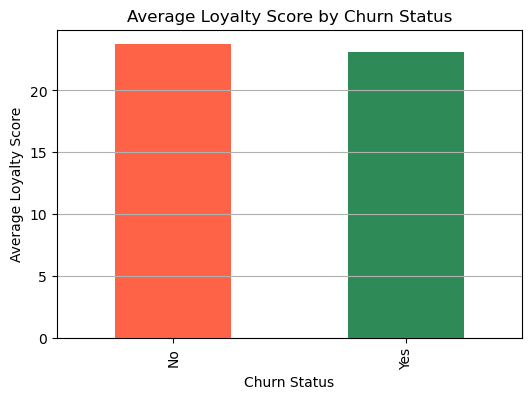

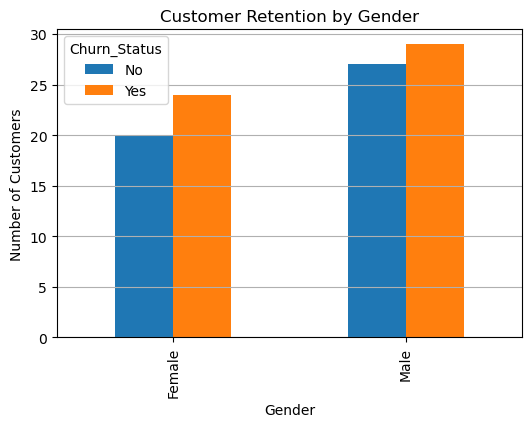

In [13]:
import matplotlib.pyplot as plt

avg_loyalty = df.groupby('Churn_Status')['Loyalty_Score'].mean()
print("Average Loyalty Score by Churn_Status")
print(avg_loyalty, "\n")

gender_retention = df.groupby(['Gender', 'Churn_Status']).size().unstack()
print("Retention by Gender")
print(gender_retention, "\n")

location_retention = df.groupby(['Location', 'Churn_Status']).size().unstack()
print("Retention by Location")
print(location_retention, "\n")

plt.figure(figsize=(6,4))
avg_loyalty.plot(kind='bar', color=['tomato', 'seagreen'])
plt.title('Average Loyalty Score by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Average Loyalty Score')
plt.grid(True, axis='y')
plt.show()

gender_retention.plot(kind='bar', figsize=(6,4))
plt.title('Customer Retention by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.legend(title='Churn_Status')
plt.grid(True, axis='y')
plt.show()